In [1]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
path = '../data/sample_coco.txt'

lines = []
with open(path) as f:
    lines = f.readlines()

In [3]:
class my_dictionary(dict):
    def __init__(self):
        self = dict()
        
    def add(self, key, value):
        self[key] = value

In [4]:
def datarestructure(columns,dataList):
    ls = []
    dataDict = my_dictionary()
    for i in dataList:
        a = i.replace(',\n','')
        val = re.findall('[0-9]+', a)
        for cnt,dat in zip(columns,val):
            dataDict.add(cnt,dat)
        ls.append(dataDict.copy())
    return ls

In [5]:
columns = ['id', 'height', 'width', 'x', 'y', 'bbox_width', 'bbox_height']
data = pd.DataFrame(datarestructure(columns,dataList=lines))
data = data.astype(dtype=np.int64)

In [6]:
data['n_height'] = [x/x for x in data.height]
data['n_width'] = [x/x for x in data.width]
data['n_x'] = [x/y for x,y in zip(data.x,data.width)]
data['n_y'] = [x/y for x,y in zip(data.y,data.height)]
data['n_bbox_width'] = [x/y for x,y in zip(data.bbox_width,data.width)]
data['n_bbox_height'] = [x/y for x,y in zip(data.bbox_height,data.height)]

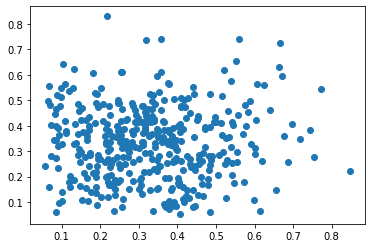

In [7]:
check = data.sample(400,axis=0)
plt.scatter(check['n_bbox_width'],check['n_bbox_height'])

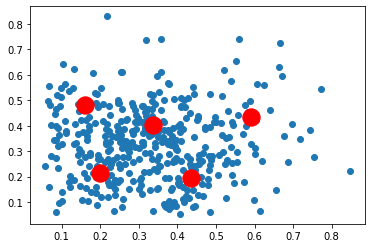

In [8]:
X = check[['n_bbox_width','n_bbox_height']].reset_index()
X = X.drop(columns=['index'])


kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X['n_bbox_width'], X['n_bbox_height'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [9]:
centroid = kmeans.cluster_centers_

In [10]:
cnt =0
centroid_dict = {}
centroid_df = pd.DataFrame()
for i in centroid:
    cnt +=1
    name = '{}'.format(cnt)
    centroid_df[name] = list(1/(abs(X['n_bbox_width'] - i[0])*abs(X['n_bbox_height'] - i[1])))
    centroid_dict[name] = i

## Anchor Box Number
X['AnchorBox#'] = centroid_df.idxmax(axis=1)

In [11]:
centroid_dict

{'1': array([0.33671414, 0.40398633]),
 '2': array([0.19993406, 0.21600157]),
 '3': array([0.58980015, 0.43541165]),
 '4': array([0.4347537 , 0.19295801]),
 '5': array([0.15932563, 0.48229995])}

In [12]:
# sample = pd.concat([X, centroid_df], axis=1)
# sample.head()

In [13]:
width_mul =[]
height_mul=[]
for _,i in enumerate(X['AnchorBox#']):
    width_mul.append(centroid_dict[i][0]*X['n_bbox_width'][_])
    height_mul.append(centroid_dict[i][1]*X['n_bbox_height'][_])

In [14]:
X['width_mul'] = width_mul
X['height_mul'] = height_mul